1. We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:
1. fitting it to the periodic function
2. plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Temperature')

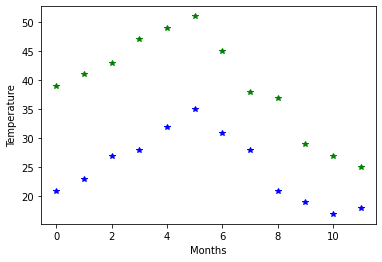

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
plt.plot(months,temp_max,'g*')
plt.plot(months,temp_min,'b*')
plt.xlabel('Months')
plt.ylabel('Temperature')

In [8]:
from scipy import optimize
def yearly_temp(time,avg,ampl,time_offset):
    return (avg + ampl * np.cos((time + time_offset) * 1.8 * np.pi / time.max()))
res_max, cov_max = optimize.curve_fit(yearly_temp,months,temp_max,[40,20,0])
res_min, cov_min = optimize.curve_fit(yearly_temp,months,temp_min,[-40,20,0])

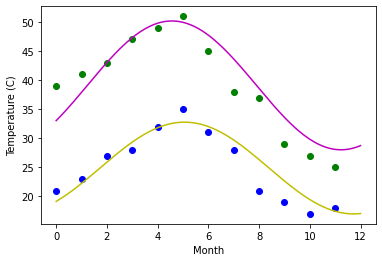

In [10]:
days = np.linspace(0,12,num = 365)
plt.figure()
plt.plot(months,temp_max,'go')
plt.plot(days,yearly_temp(days, *res_max),'m-')
plt.plot(months,temp_min,'bo')
plt.plot(days,yearly_temp(days, *res_min),'y-')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()

2. This assignment is for visualization using matplotlib:
data to use:
    
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [13]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
df.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

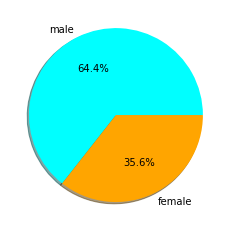

In [20]:
labels =['male','female']
size = df.sex.value_counts()
fig , axis = plt.subplots()
axis.pie(size, labels = labels, autopct = '%1.1f%%', shadow = True, colors = ['cyan','orange'])
plt.show()

In [29]:
colors = {'male':'blue', 'female':'orange'}
axis.scatter(df.fare,df.age,c=df.sex.iloc[:-1].apply(lambda x: colors[x]))
axis.set_xlabel('Fare')
axis.set_ylabel('Age')
axis.set_title('Fare paid and the Age')
plt.figure()

ValueError: 'c' argument has 1309 elements, which is inconsistent with 'x' and 'y' with size 1310.

<Figure size 432x288 with 0 Axes>

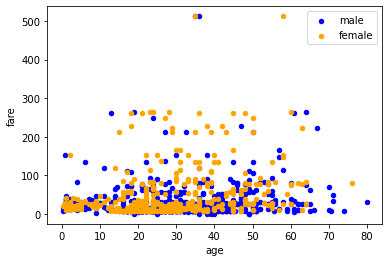

In [37]:
plt.figure()
plot = df[df.sex=='male'].plot.scatter('age','fare',color='blue',label='male')
df[df.sex=='female'].plot.scatter('age','fare',color='orange',label='female',ax= plot)